#📌 Extracción

https://app.aluracursos.com/course/estadistica-python-frecuencias-medidas

Coneccion con google drive

In [46]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importación de las librerias de python

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
from matplotlib.spines import Spine
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Normalización de archivos JSON

In [48]:
datos_clientes = pd.read_json('/content/drive/MyDrive/Colab Notebooks/Challenger_Telecom_X/TelecomX_Data.json')

In [49]:
datos_clientes = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Challenger_Telecom_X/TelecomX_Data_Normalized.csv')

In [50]:
datos_clientes.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#Transformación

In [51]:
datos_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [52]:
column_map = {
    'customerID': 'ID_Cliente',
    'Churn': 'Abandono',
    'customer.gender': 'Género',
    'customer.SeniorCitizen': 'Adulto_Mayor',
    'customer.Partner': 'Pareja',
    'customer.Dependents': 'Dependientes',
    'customer.tenure': 'Antiguedad_Meses',
    'phone.PhoneService': 'Servicio_Telefónico',
    'phone.MultipleLines': 'Multiples_Líneas',
    'internet.InternetService': 'Servicio_Internet',
    'internet.OnlineSecurity': 'Seguridad_On_línea',
    'internet.OnlineBackup': 'Respaldo_On_línea',
    'internet.DeviceProtection': 'Protección_Dispositivo',
    'internet.TechSupport': 'Soporte_Técnico',
    'internet.StreamingTV': 'Streaming_TV',
    'internet.StreamingMovies': 'Streaming_Películas',
    'account.Contract': 'Contrato',
    'account.PaperlessBilling': 'Factura_Electrónica',
    'account.PaymentMethod': 'Mtodo_Pago',
    'account.Charges.Monthly': 'Cargo_Mensual',
    'account.Charges.Total': 'Cargo_Total'
}

In [53]:
datos_clientes_esp = datos_clientes.rename(columns=column_map)

In [54]:
datos_clientes_esp.head()

,ID_Cliente,Abandono,Género,Adulto_Mayor,Pareja,Dependientes,Antiguedad_Meses,Servicio_Telefónico,Multiples_Líneas,Servicio_Internet,...,Respaldo_On_línea,Protección_Dispositivo,Soporte_Técnico,Streaming_TV,Streaming_Películas,Contrato,Factura_Electrónica,Mtodo_Pago,Cargo_Mensual,Cargo_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [55]:
value_map = {
    "Yes": "Sí",
    "No": "No",
    "Female": "Femenino",
    "Male": "Masculino",
    "No phone service": "Sin servicio telefónico",
    "No internet service": "Sin servicio de internet",
    "Month-to-month": "Mes a mes",
    "One year": "Un año",
    "Two year": "Dos años",
    "Electronic check": "Cheque electrónico",
    "Mailed check": "Cheque por correo",
    "Bank transfer (automatic)": "Transferencia bancaria (automática)",
    "Credit card (automatic)": "Tarjeta de crédito (automática)"
}

In [56]:
datos_clientes_esp = datos_clientes_esp.replace(value_map)

In [57]:
datos_clientes_esp.head()

,ID_Cliente,Abandono,Género,Adulto_Mayor,Pareja,Dependientes,Antiguedad_Meses,Servicio_Telefónico,Multiples_Líneas,Servicio_Internet,...,Respaldo_On_línea,Protección_Dispositivo,Soporte_Técnico,Streaming_TV,Streaming_Películas,Contrato,Factura_Electrónica,Mtodo_Pago,Cargo_Mensual,Cargo_Total
0,0002-ORFBO,No,Femenino,0,Sí,Sí,9,Sí,No,DSL,...,Sí,No,Sí,Sí,No,Un año,Sí,Cheque por correo,65.6,593.3
1,0003-MKNFE,No,Masculino,0,No,No,9,Sí,Sí,DSL,...,No,No,No,No,Sí,Mes a mes,No,Cheque por correo,59.9,542.4
2,0004-TLHLJ,Sí,Masculino,0,No,No,4,Sí,No,Fiber optic,...,No,Sí,No,No,No,Mes a mes,Sí,Cheque electrónico,73.9,280.85
3,0011-IGKFF,Sí,Masculino,1,Sí,No,13,Sí,No,Fiber optic,...,Sí,Sí,No,Sí,Sí,Mes a mes,Sí,Cheque electrónico,98.0,1237.85
4,0013-EXCHZ,Sí,Femenino,1,Sí,No,3,Sí,No,Fiber optic,...,No,No,Sí,Sí,No,Mes a mes,Sí,Cheque por correo,83.9,267.4


## Manejo de inconsistencias

In [58]:
#se conbierten los datos de la columna Adulto mayor de 0 a no y 1 a si
datos_clientes_esp['Adulto_Mayor'] = datos_clientes_esp['Adulto_Mayor'].replace({0: 'No', 1: 'Sí'}).astype('object')

In [59]:
datos_clientes_esp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID_Cliente              7267 non-null   object 
 1   Abandono                7043 non-null   object 
 2   Género                  7267 non-null   object 
 3   Adulto_Mayor            7267 non-null   object 
 4   Pareja                  7267 non-null   object 
 5   Dependientes            7267 non-null   object 
 6   Antiguedad_Meses        7267 non-null   int64  
 7   Servicio_Telefónico     7267 non-null   object 
 8   Multiples_Líneas        7267 non-null   object 
 9   Servicio_Internet       7267 non-null   object 
 10  Seguridad_On_línea      7267 non-null   object 
 11  Respaldo_On_línea       7267 non-null   object 
 12  Protección_Dispositivo  7267 non-null   object 
 13  Soporte_Técnico         7267 non-null   object 
 14  Streaming_TV            7267 non-null   

In [60]:
#Corregimos errores en la columna cargo_total
datos_clientes_esp['Cargo_Total'] = pd.to_numeric(datos_clientes_esp['Cargo_Total'], errors='coerce')

In [61]:
datos_clientes_esp['Cargo_Total'] = datos_clientes_esp['Cargo_Total'].astype(np.float64)

In [62]:
datos_clientes_esp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID_Cliente              7267 non-null   object 
 1   Abandono                7043 non-null   object 
 2   Género                  7267 non-null   object 
 3   Adulto_Mayor            7267 non-null   object 
 4   Pareja                  7267 non-null   object 
 5   Dependientes            7267 non-null   object 
 6   Antiguedad_Meses        7267 non-null   int64  
 7   Servicio_Telefónico     7267 non-null   object 
 8   Multiples_Líneas        7267 non-null   object 
 9   Servicio_Internet       7267 non-null   object 
 10  Seguridad_On_línea      7267 non-null   object 
 11  Respaldo_On_línea       7267 non-null   object 
 12  Protección_Dispositivo  7267 non-null   object 
 13  Soporte_Técnico         7267 non-null   object 
 14  Streaming_TV            7267 non-null   

In [63]:
datos_clientes_esp.head()

,ID_Cliente,Abandono,Género,Adulto_Mayor,Pareja,Dependientes,Antiguedad_Meses,Servicio_Telefónico,Multiples_Líneas,Servicio_Internet,...,Respaldo_On_línea,Protección_Dispositivo,Soporte_Técnico,Streaming_TV,Streaming_Películas,Contrato,Factura_Electrónica,Mtodo_Pago,Cargo_Mensual,Cargo_Total
0,0002-ORFBO,No,Femenino,No,Sí,Sí,9,Sí,No,DSL,...,Sí,No,Sí,Sí,No,Un año,Sí,Cheque por correo,65.6,593.30
1,0003-MKNFE,No,Masculino,No,No,No,9,Sí,Sí,DSL,...,No,No,No,No,Sí,Mes a mes,No,Cheque por correo,59.9,542.40
2,0004-TLHLJ,Sí,Masculino,No,No,No,4,Sí,No,Fiber optic,...,No,Sí,No,No,No,Mes a mes,Sí,Cheque electrónico,73.9,280.85
3,0011-IGKFF,Sí,Masculino,Sí,Sí,No,13,Sí,No,Fiber optic,...,Sí,Sí,No,Sí,Sí,Mes a mes,Sí,Cheque electrónico,98.0,1237.85
4,0013-EXCHZ,Sí,Femenino,Sí,Sí,No,3,Sí,No,Fiber optic,...,No,No,Sí,Sí,No,Mes a mes,Sí,Cheque por correo,83.9,267.40


In [64]:
datos_clientes_esp.isnull().sum()

,0
ID_Cliente,0
Abandono,224
Género,0
Adulto_Mayor,0
Pareja,0
Dependientes,0
Antiguedad_Meses,0
Servicio_Telefónico,0
Multiples_Líneas,0
Servicio_Internet,0


In [65]:
#Aquí estamos llenando los datoserrados y los reemplazamos por datos reales, donde asumiremos que en estos datos no abandonaron el servicio ya que son pocos

datos_clientes_esp['Abandono'] = datos_clientes_esp['Abandono'].fillna('No')

In [66]:
#Aquí reemplazamos los datos faltantes por la media de todos los datos de la columna cargo total

datos_clientes_esp['Cargo_Total'] = datos_clientes_esp['Cargo_Total'].fillna(datos_clientes_esp['Cargo_Total'].mean())

In [67]:
datos_clientes_esp.isnull().sum()

,0
ID_Cliente,0
Abandono,0
Género,0
Adulto_Mayor,0
Pareja,0
Dependientes,0
Antiguedad_Meses,0
Servicio_Telefónico,0
Multiples_Líneas,0
Servicio_Internet,0


In [68]:
# Lista de columnas a eliminar
columnas_a_eliminar = [
    'ID_Cliente',
    'Factura_Electrónica',
    'Streaming_Películas',
    'Servicio_Telefónico',
    'Multiples_Líneas',
    'Cargo_Total'
]
# eliminamos las columnas que estan en el data frame que no son relevantes

datos_clientes_esp = datos_clientes_esp.drop(columns=[col for col in columnas_a_eliminar if col in datos_clientes_esp.columns])

In [69]:
datos_clientes_esp.columns.tolist()

['Abandono',
 'Género',
 'Adulto_Mayor',
 'Pareja',
 'Dependientes',
 'Antiguedad_Meses',
 'Servicio_Internet',
 'Seguridad_On_línea',
 'Respaldo_On_línea',
 'Protección_Dispositivo',
 'Soporte_Técnico',
 'Streaming_TV',
 'Contrato',
 'Mtodo_Pago',
 'Cargo_Mensual']

In [70]:
datos_clientes_esp.head()

,Abandono,Género,Adulto_Mayor,Pareja,Dependientes,Antiguedad_Meses,Servicio_Internet,Seguridad_On_línea,Respaldo_On_línea,Protección_Dispositivo,Soporte_Técnico,Streaming_TV,Contrato,Mtodo_Pago,Cargo_Mensual
0,No,Femenino,No,Sí,Sí,9,DSL,No,Sí,No,Sí,Sí,Un año,Cheque por correo,65.6
1,No,Masculino,No,No,No,9,DSL,No,No,No,No,No,Mes a mes,Cheque por correo,59.9
2,Sí,Masculino,No,No,No,4,Fiber optic,No,No,Sí,No,No,Mes a mes,Cheque electrónico,73.9
3,Sí,Masculino,Sí,Sí,No,13,Fiber optic,No,Sí,Sí,No,Sí,Mes a mes,Cheque electrónico,98.0
4,Sí,Femenino,Sí,Sí,No,3,Fiber optic,No,No,No,Sí,Sí,Mes a mes,Cheque por correo,83.9


In [71]:
datos_clientes_esp = datos_clientes_esp.reset_index(drop=True)

In [72]:
datos_clientes_esp.head()

,Abandono,Género,Adulto_Mayor,Pareja,Dependientes,Antiguedad_Meses,Servicio_Internet,Seguridad_On_línea,Respaldo_On_línea,Protección_Dispositivo,Soporte_Técnico,Streaming_TV,Contrato,Mtodo_Pago,Cargo_Mensual
0,No,Femenino,No,Sí,Sí,9,DSL,No,Sí,No,Sí,Sí,Un año,Cheque por correo,65.6
1,No,Masculino,No,No,No,9,DSL,No,No,No,No,No,Mes a mes,Cheque por correo,59.9
2,Sí,Masculino,No,No,No,4,Fiber optic,No,No,Sí,No,No,Mes a mes,Cheque electrónico,73.9
3,Sí,Masculino,Sí,Sí,No,13,Fiber optic,No,Sí,Sí,No,Sí,Mes a mes,Cheque electrónico,98.0
4,Sí,Femenino,Sí,Sí,No,3,Fiber optic,No,No,No,Sí,Sí,Mes a mes,Cheque por correo,83.9


In [73]:
## Columna de cuentas diarias

In [74]:
datos_clientes_esp['Cuentas_Diarias'] = datos_clientes_esp['Cargo_Mensual'] / 30


In [75]:
datos_clientes_esp.head()

,Abandono,Género,Adulto_Mayor,Pareja,Dependientes,Antiguedad_Meses,Servicio_Internet,Seguridad_On_línea,Respaldo_On_línea,Protección_Dispositivo,Soporte_Técnico,Streaming_TV,Contrato,Mtodo_Pago,Cargo_Mensual,Cuentas_Diarias
0,No,Femenino,No,Sí,Sí,9,DSL,No,Sí,No,Sí,Sí,Un año,Cheque por correo,65.6,2.186667
1,No,Masculino,No,No,No,9,DSL,No,No,No,No,No,Mes a mes,Cheque por correo,59.9,1.996667
2,Sí,Masculino,No,No,No,4,Fiber optic,No,No,Sí,No,No,Mes a mes,Cheque electrónico,73.9,2.463333
3,Sí,Masculino,Sí,Sí,No,13,Fiber optic,No,Sí,Sí,No,Sí,Mes a mes,Cheque electrónico,98.0,3.266667
4,Sí,Femenino,Sí,Sí,No,3,Fiber optic,No,No,No,Sí,Sí,Mes a mes,Cheque por correo,83.9,2.796667


In [76]:
datos_clientes_limpios = datos_clientes_esp.copy()

In [77]:
datos_clientes_limpios['Género'] = datos_clientes_limpios['Género'].replace({'Female': 'Femenino', 'Male': 'Masculino'})

In [78]:
datos_clientes_limpios.head()

,Abandono,Género,Adulto_Mayor,Pareja,Dependientes,Antiguedad_Meses,Servicio_Internet,Seguridad_On_línea,Respaldo_On_línea,Protección_Dispositivo,Soporte_Técnico,Streaming_TV,Contrato,Mtodo_Pago,Cargo_Mensual,Cuentas_Diarias
0,No,Femenino,No,Sí,Sí,9,DSL,No,Sí,No,Sí,Sí,Un año,Cheque por correo,65.6,2.186667
1,No,Masculino,No,No,No,9,DSL,No,No,No,No,No,Mes a mes,Cheque por correo,59.9,1.996667
2,Sí,Masculino,No,No,No,4,Fiber optic,No,No,Sí,No,No,Mes a mes,Cheque electrónico,73.9,2.463333
3,Sí,Masculino,Sí,Sí,No,13,Fiber optic,No,Sí,Sí,No,Sí,Mes a mes,Cheque electrónico,98.0,3.266667
4,Sí,Femenino,Sí,Sí,No,3,Fiber optic,No,No,No,Sí,Sí,Mes a mes,Cheque por correo,83.9,2.796667


## Análisis Descriptivo

### Descripción
Para comenzar, realiza un análisis descriptivo de los datos, calculando métricas como media, mediana, desviación estándar y otras medidas que ayuden a comprender mejor la distribución y el comportamiento de los clientes.

In [79]:
datos_clientes_limpios.describe()

,Antiguedad_Meses,Cargo_Mensual,Cuentas_Diarias
count,7267.000000,7267.000000,7267.000000
mean,32.346498,64.720098,2.157337
std,24.571773,30.129572,1.004319
min,0.000000,18.250000,0.608333
25%,9.000000,35.425000,1.180833
50%,29.000000,70.300000,2.343333
75%,55.000000,89.875000,2.995833
max,72.000000,118.750000,3.958333


## Distribución de evasión

### Descripción:

En este paso, el objetivo es comprender cómo está distribuida la variable "churn" (evasión) entre los clientes. Utiliza gráficos para visualizar la proporción de clientes que permanecieron y los que se dieron de baja.

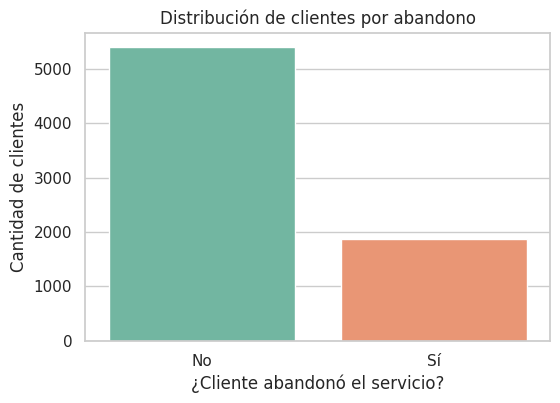

In [80]:

# Ajustar el estilo
sns.set(style="whitegrid")

# Conteo de churn
plt.figure(figsize=(6,4))
sns.countplot(datos_clientes_limpios, x='Abandono', palette='Set2')

plt.title('Distribución de clientes por abandono')
plt.xlabel('¿Cliente abandonó el servicio?')
plt.ylabel('Cantidad de clientes')
plt.xticks([0,1], ['No', 'Sí'])
plt.show()


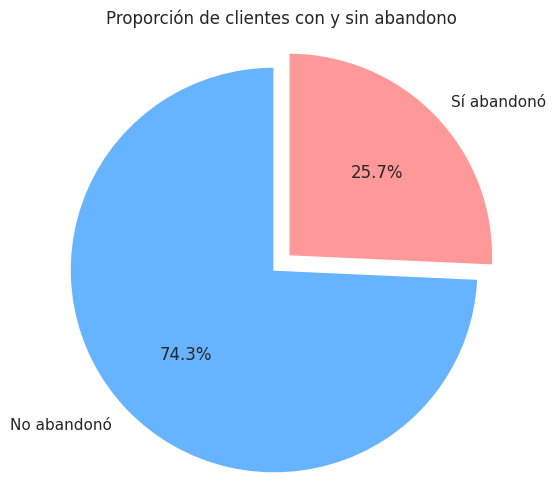

In [81]:
# Calcular proporción
churn_counts = datos_clientes_limpios['Abandono'].value_counts()
labels = ['No abandonó', 'Sí abandonó']
colors = ['#66b3ff','#ff9999']

# Gráfico
plt.figure(figsize=(6,6))
plt.pie(churn_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=(0, 0.1))
plt.title('Proporción de clientes con y sin abandono')
plt.axis('equal')  # Círculo perfecto
plt.show()


## Recuento de evasión por variables categóricas

###Descripción:

Ahora, exploraremos cómo se distribuye la evasión según variables categóricas, como género, tipo de contrato, método de pago, entre otras.

Este análisis puede revelar patrones interesantes, por ejemplo, si los clientes de ciertos perfiles tienen una mayor tendencia a cancelar el servicio, lo que ayudará a orientar acciones estratégicas.

### Gráficos de evasión vs variables categóricas

### Evasión por género

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

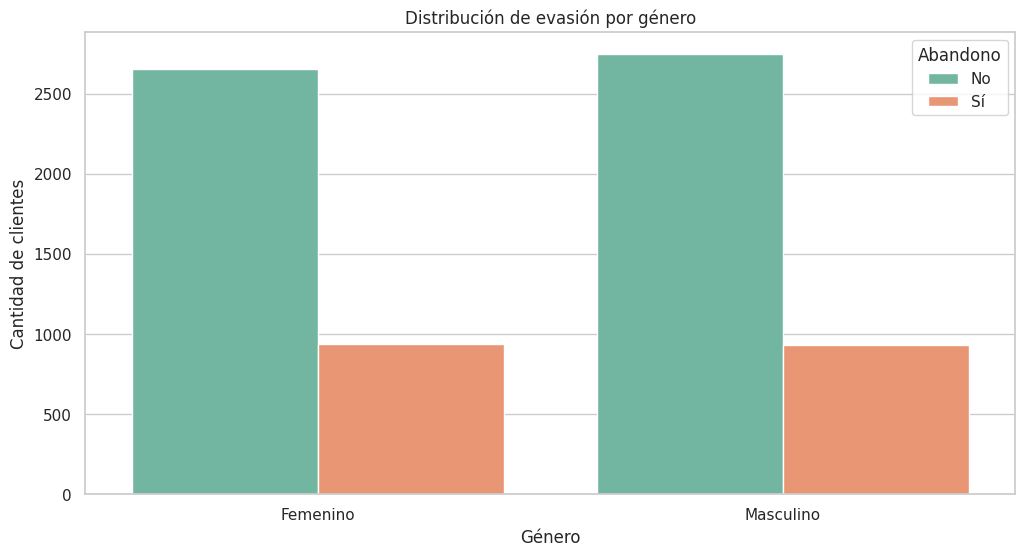

In [82]:
plt.figure(figsize=(12, 6))
sns.countplot(data=datos_clientes_limpios, x='Género', hue='Abandono', palette='Set2')
plt.title('Distribución de evasión por género')
plt.xlabel('Género')
plt.ylabel('Cantidad de clientes')
plt

### Evasión por Tipo de Contrato

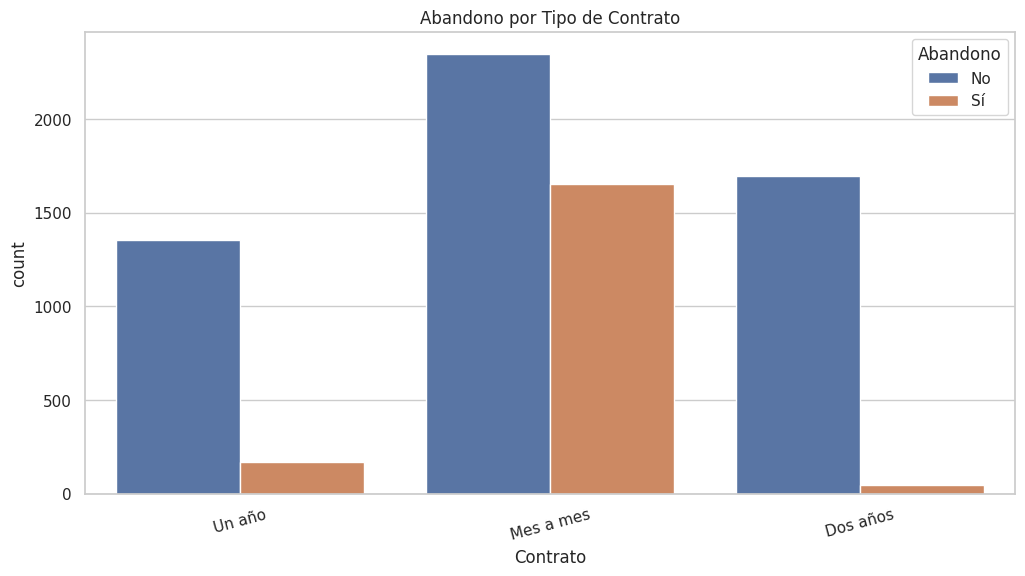

In [83]:
plt.figure(figsize=(12, 6))
sns.countplot(data=datos_clientes_limpios, x='Contrato', hue='Abandono')
plt.title('Abandono por Tipo de Contrato')
plt.xticks(rotation=15)
plt.show()

### Evasión por Método de Pago

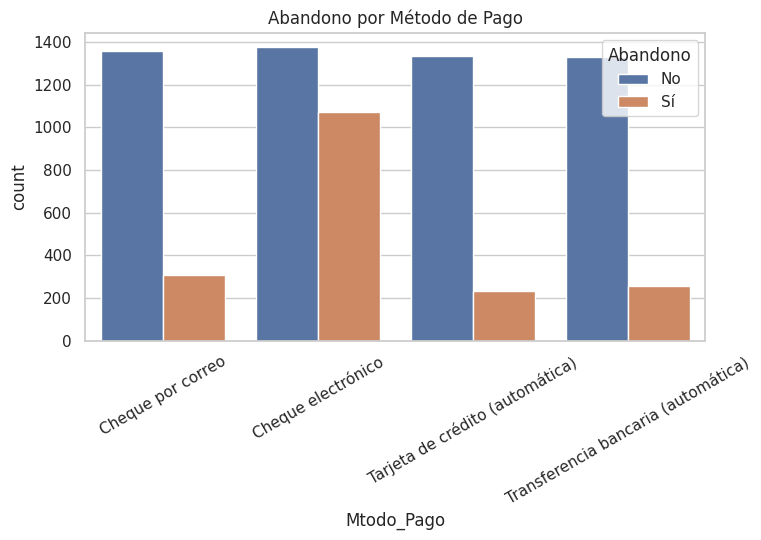

In [84]:
plt.figure(figsize=(8,4))
sns.countplot(data=datos_clientes_limpios, x='Mtodo_Pago', hue='Abandono')
plt.title('Abandono por Método de Pago')
plt.xticks(rotation=30)
plt.show()

### Evasión por Servicio de Internet

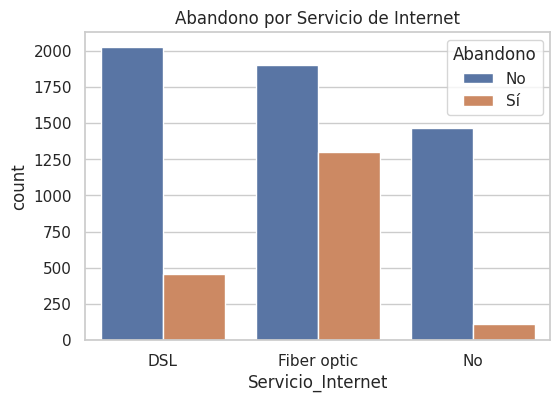

In [85]:
plt.figure(figsize=(6,4))
sns.countplot(data=datos_clientes_limpios, x='Servicio_Internet', hue='Abandono')
plt.title('Abandono por Servicio de Internet')
plt.show()


### Porcentaje de evasión por categoría

In [86]:
tabla_genero = pd.crosstab(datos_clientes_limpios['Género'], datos_clientes_limpios['Abandono'], normalize='index') * 100
print(tabla_genero)

Abandono          No         Sí
Género                         
Femenino   73.858575  26.141425
Masculino  74.693878  25.306122


## Conteo de evasión por variables numéricas

### Descripción
En este paso, explora cómo las variables numéricas, como "total gastado" o "tiempo de contrato", se distribuyen entre los clientes que cancelaron (evasión) y los que no cancelaron.

Este análisis ayuda a entender si ciertos valores numéricos están más asociados con la evasión, proporcionando insights sobre los factores que influyen en el comportamiento de los clientes.

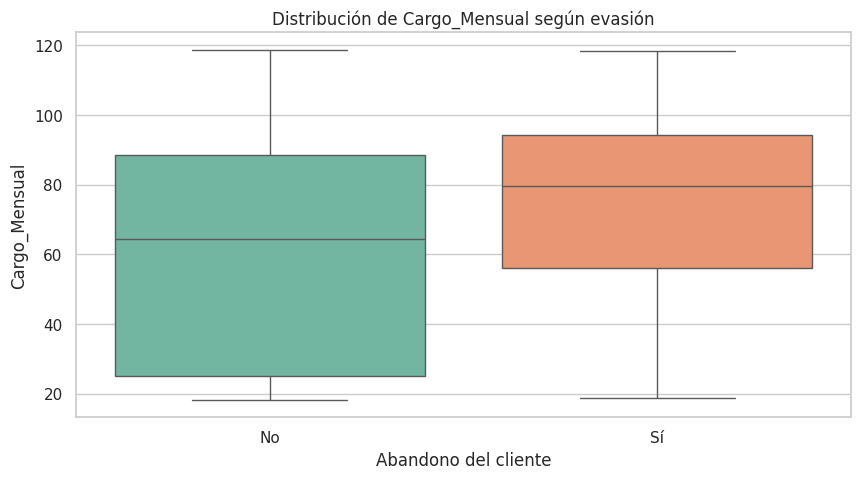

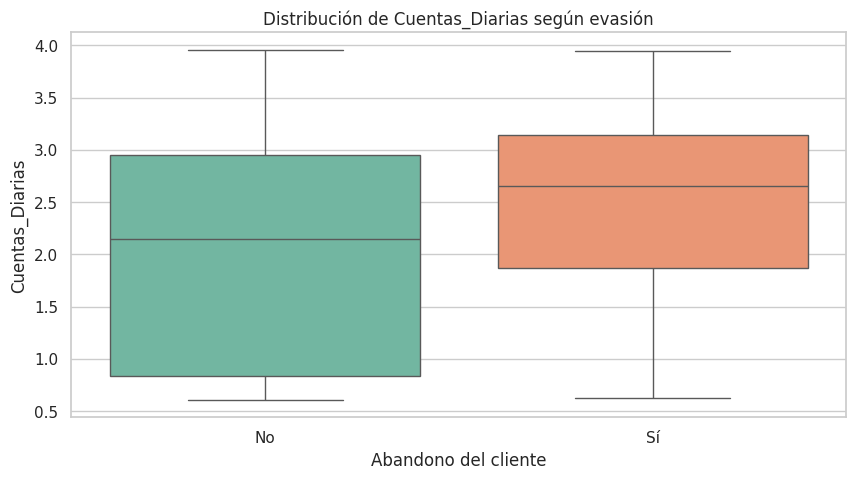

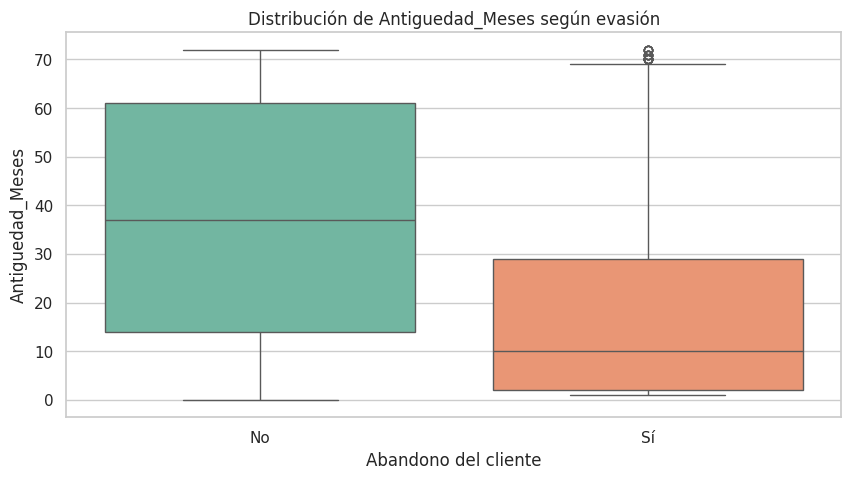

In [87]:
# Cambiar estilo
sns.set(style="whitegrid")

# Lista de columnas numéricas a analizar
columnas_numericas = ['Cargo_Mensual', 'Cuentas_Diarias', 'Antiguedad_Meses']

# Gráficos por columna
for columna in columnas_numericas:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=datos_clientes_limpios, x='Abandono', y=columna, palette='Set2')
    plt.title(f'Distribución de {columna} según evasión')
    plt.xlabel('Abandono del cliente')
    plt.ylabel(columna)
    plt.show()


### Métricas estadísticas por grupo

In [88]:
# Agrupar por evasión y calcular media, mediana, std
resumen = datos_clientes_limpios.groupby('Abandono')[columnas_numericas].agg(['mean', 'median', 'std'])
print(resumen)


         Cargo_Mensual                   Cuentas_Diarias                   \
                  mean median        std            mean median       std   
Abandono                                                                    
No           61.354224  64.50  31.105006        2.045141  2.150  1.036834   
Sí           74.441332  79.65  24.666053        2.481378  2.655  0.822202   

         Antiguedad_Meses                    
                     mean median        std  
Abandono                                     
No              37.321045   37.0  24.178367  
Sí              17.979133   10.0  19.531123  


In [92]:
# Identificar columnas categóricas
cat_cols = datos_clientes_limpios.select_dtypes(include=["object"]).columns.tolist()
print("Columnas categóricas a codificar:", cat_cols)

# Aplicar One-Hot Encoding
df_encoded = pd.get_dummies(datos_clientes_limpios, columns=cat_cols, drop_first=True)

print("\nDimensiones después de la codificación:", df_encoded.shape)
print("\nPrimeras columnas resultantes:")
print(df_encoded.head())

Columnas categóricas a codificar: ['Abandono', 'Género', 'Adulto_Mayor', 'Pareja', 'Dependientes', 'Servicio_Internet', 'Seguridad_On_línea', 'Respaldo_On_línea', 'Protección_Dispositivo', 'Soporte_Técnico', 'Streaming_TV', 'Contrato', 'Mtodo_Pago']

Dimensiones después de la codificación: (7267, 25)

Primeras columnas resultantes:
   Antiguedad_Meses  Cargo_Mensual  Cuentas_Diarias  Abandono_Sí  \
0                 9           65.6         2.186667        False   
1                 9           59.9         1.996667        False   
2                 4           73.9         2.463333         True   
3                13           98.0         3.266667         True   
4                 3           83.9         2.796667         True   

   Género_Masculino  Adulto_Mayor_Sí  Pareja_Sí  Dependientes_Sí  \
0             False            False       True             True   
1              True            False      False            False   
2              True            False      False      

Número de clientes por clase:
 Abandono
No    5398
Sí    1869
Name: count, dtype: int64

Proporción (%) de clientes por clase:
 Abandono
No    74.280996
Sí    25.719004
Name: proportion, dtype: float64


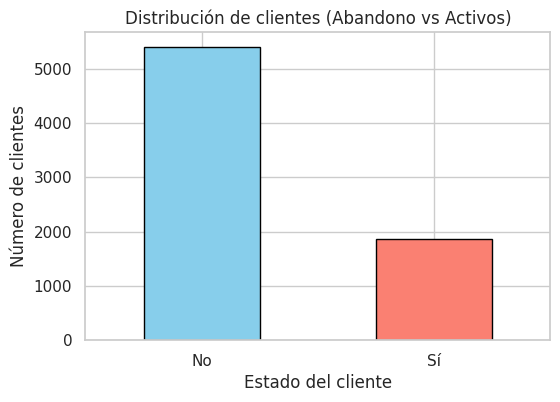

In [93]:
# Distribución de la variable objetivo
churn_counts = datos_clientes_limpios["Abandono"].value_counts()
churn_percent = datos_clientes_limpios["Abandono"].value_counts(normalize=True) * 100

print("Número de clientes por clase:\n", churn_counts)
print("\nProporción (%) de clientes por clase:\n", churn_percent)

# Visualización
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
churn_counts.plot(kind="bar", color=["skyblue", "salmon"], edgecolor="black")
plt.title("Distribución de clientes (Abandono vs Activos)")
plt.xlabel("Estado del cliente")
plt.ylabel("Número de clientes")
plt.xticks(rotation=0)
plt.show()

In [94]:
num_cols = datos_clientes_limpios.select_dtypes(include=["int64", "float64"]).columns.tolist()
print("Columnas numéricas detectadas:", num_cols)

# Resumen estadístico para ver escalas diferentes
print("\nResumen estadístico de las variables numéricas:")
display(datos_clientes_limpios[num_cols].describe())

# Nota para el modelado:
print("\n📌 Recomendación de preprocesamiento según el modelo:")

print("\nModelos sensibles a la escala (REQUERIDO normalizar/estandarizar):")
print(" - KNN")
print(" - SVM")
print(" - Regresión Logística")
print(" - Redes Neuronales")

print("\nModelos NO sensibles a la escala (NO requiere normalizar):")
print(" - Decision Tree")
print(" - Random Forest")
print(" - XGBoost")


Columnas numéricas detectadas: ['Antiguedad_Meses', 'Cargo_Mensual', 'Cuentas_Diarias']

Resumen estadístico de las variables numéricas:


,Antiguedad_Meses,Cargo_Mensual,Cuentas_Diarias
count,7267.000000,7267.000000,7267.000000
mean,32.346498,64.720098,2.157337
std,24.571773,30.129572,1.004319
min,0.000000,18.250000,0.608333
25%,9.000000,35.425000,1.180833
50%,29.000000,70.300000,2.343333
75%,55.000000,89.875000,2.995833
max,72.000000,118.750000,3.958333



📌 Recomendación de preprocesamiento según el modelo:

Modelos sensibles a la escala (REQUERIDO normalizar/estandarizar):
 - KNN
 - SVM
 - Regresión Logística
 - Redes Neuronales

Modelos NO sensibles a la escala (NO requiere normalizar):
 - Decision Tree
 - Random Forest
 - XGBoost


Correlación de variables

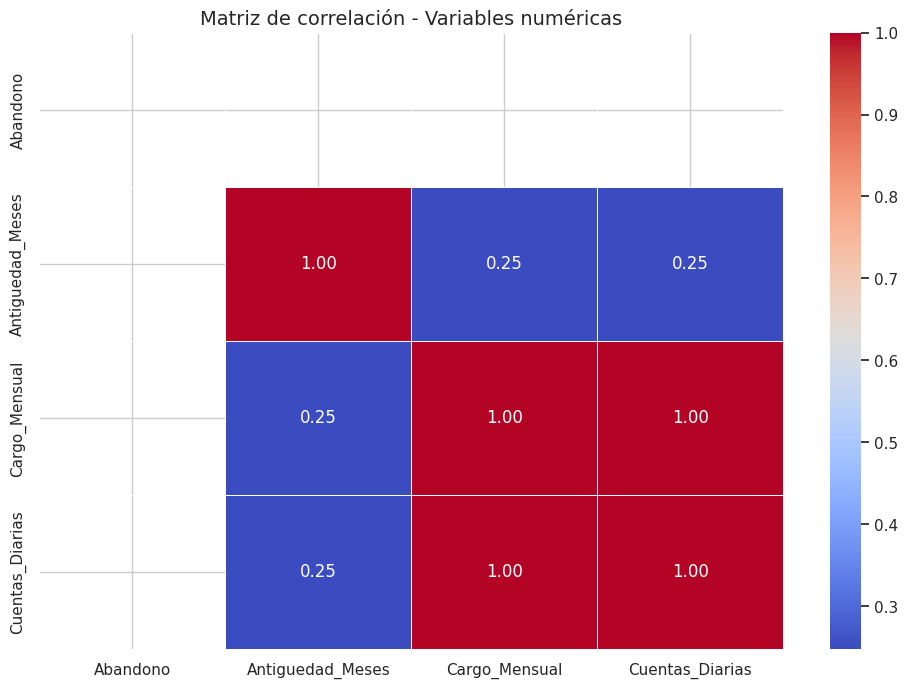


🔎 Correlación de las variables numéricas con 'Abandono':
Abandono           NaN
Antiguedad_Meses   NaN
Cargo_Mensual      NaN
Cuentas_Diarias    NaN
Name: Abandono, dtype: float64


In [95]:
# Aseguramos que Abandono esté en formato numérico (1 = Sí, 0 = No)
if datos_clientes_limpios["Abandono"].dtype == "object":
    datos_clientes_limpios["Abandono"] = datos_clientes_limpios["Abandono"].map({"Yes": 1, "No": 0})

# Seleccionar variables numéricas
num_cols = datos_clientes_limpios.select_dtypes(include=["int64", "float64"]).columns

# Calcular matriz de correlación
corr_matrix = datos_clientes_limpios[num_cols].corr()

# Visualizar matriz de correlación
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de correlación - Variables numéricas", fontsize=14)
plt.show()

# Mostrar correlación de cada variable con la variable objetivo Abandono
cor_target = corr_matrix["Abandono"].sort_values(ascending=False)
print("\n🔎 Correlación de las variables numéricas con 'Abandono':")
print(cor_target)

Análisis dirigido

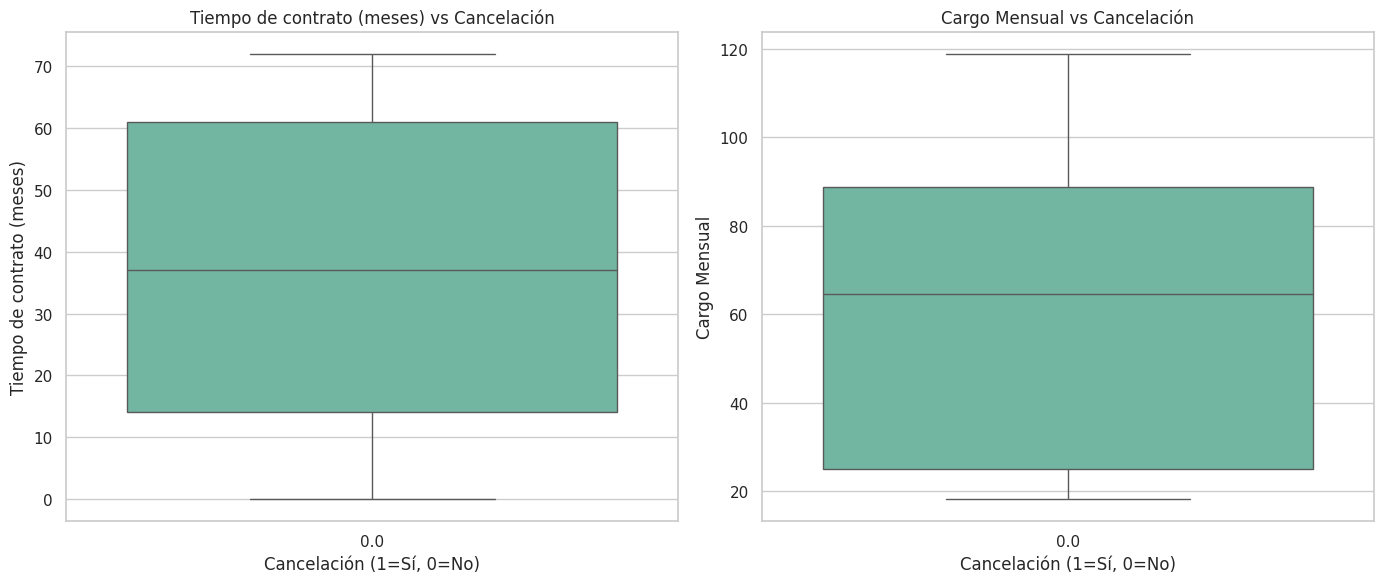

In [96]:
# Aseguramos que Abandono sea numérico (1 = Sí, 0 = No)
if datos_clientes_limpios["Abandono"].dtype == "object":
    datos_clientes_limpios["Abandono"] = datos_clientes_limpios["Abandono"].map({"Yes": 1, "No": 0})

plt.figure(figsize=(14,6))

# --- Boxplot: Tiempo de contrato vs Cancelación ---
plt.subplot(1,2,1)
sns.boxplot(x="Abandono", y="Antiguedad_Meses", data=datos_clientes_limpios, palette="Set2")
plt.title("Tiempo de contrato (meses) vs Cancelación")
plt.xlabel("Cancelación (1=Sí, 0=No)")
plt.ylabel("Tiempo de contrato (meses)")

# --- Boxplot: Gasto total (Cargo Mensual * Cuentas Diarias) vs Cancelación ---
plt.subplot(1,2,2)
sns.boxplot(x="Abandono", y="Cargo_Mensual", data=datos_clientes_limpios, palette="Set2")
plt.title("Cargo Mensual vs Cancelación")
plt.xlabel("Cancelación (1=Sí, 0=No)")
plt.ylabel("Cargo Mensual")

plt.tight_layout()
plt.show()

In [99]:
# 🔹 Revisar valores nulos en la variable objetivo
print("Valores nulos en Abandono:", datos_clientes_limpios["Abandono"].isna().sum())

# Eliminar filas con NaN en Abandono
datos_clientes_limpios = datos_clientes_limpios.dropna(subset=["Abandono"])

# Definir X e y nuevamente
X = datos_clientes_limpios.drop(columns=["Abandono"])
y = datos_clientes_limpios["Abandono"]

# División en entrenamiento y prueba
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Tamaño del dataset completo:", X.shape[0])
print("Tamaño entrenamiento:", X_train.shape[0])
print("Tamaño prueba:", X_test.shape[0])


Valores nulos en Abandono: 1869
Tamaño del dataset completo: 5398
Tamaño entrenamiento: 3778
Tamaño prueba: 1620


 Modelado Predictivo

In [100]:
# 🔹 División de datos en entrenamiento y prueba

from sklearn.model_selection import train_test_split

# Definir variables predictoras (X) y variable objetivo (y)
X = datos_clientes_limpios.drop(columns=["Abandono"])
y = datos_clientes_limpios["Abandono"]

# División 70/30 (puedes cambiar test_size=0.2 si prefieres 80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Tamaño del dataset completo:", X.shape[0])
print("Tamaño entrenamiento:", X_train.shape[0])
print("Tamaño prueba:", X_test.shape[0])

Tamaño del dataset completo: 5398
Tamaño entrenamiento: 3778
Tamaño prueba: 1620


Creación de Modelos

In [102]:
# 🔹 Codificar variables categóricas antes de dividir
import pandas as pd

# Creamos una copia y aplicamos One-Hot Encoding a todo el dataset
datos_encoded = pd.get_dummies(datos_clientes_limpios, drop_first=True)

# Dividimos en X e y nuevamente
X = datos_encoded.drop(columns=["Abandono"])
y = datos_encoded["Abandono"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("✅ Datos listos: todas las variables son numéricas")
print("Tamaño entrenamiento:", X_train.shape)
print("Tamaño prueba:", X_test.shape)


✅ Datos listos: todas las variables son numéricas
Tamaño entrenamiento: (3778, 24)
Tamaño prueba: (1620, 24)


In [104]:
# 🔹 Normalización solo para modelos que lo requieren
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Escalar todo X_train y X_test (ya que todas las columnas son numéricas)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ==============================
# 1️⃣ Modelo con normalización: Regresión Logística
# ==============================
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train_scaled, y_train)
y_pred_log = log_model.predict(X_test_scaled)

print("📌 Regresión Logística (con normalización)")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

# ==============================
# 2️⃣ Modelo sin normalización: Árbol de Decisión
# ==============================
tree_model = DecisionTreeClassifier(random_state=42, max_depth=5)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

print("\n📌 Árbol de Decisión (sin normalización)")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))


ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: np.float64(0.0)

In [106]:
# ============================
# 📌 Predicciones
# ============================

# Predicciones con Regresión Logística
y_pred_log = log_model.predict(X_test_norm)

# Predicciones con Árbol de Decisión
y_pred_tree = tree_model.predict(X_test_norm)


AttributeError: 'LogisticRegression' object has no attribute 'coef_'

In [105]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# ==============================
# 📌 Evaluación Regresión Logística
# ==============================
print("📊 Regresión Logística\n")

print("Exactitud:", accuracy_score(y_test, y_pred_log))
print("Precisión:", precision_score(y_test, y_pred_log))
print("Recall:", recall_score(y_test, y_pred_log))
print("F1-score:", f1_score(y_test, y_pred_log))

# Matriz de confusión
cm_log = confusion_matrix(y_test, y_pred_log)
disp_log = ConfusionMatrixDisplay(confusion_matrix=cm_log, display_labels=log_model.classes_)
disp_log.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión - Regresión Logística")
plt.show()

# ==============================
# 📌 Evaluación Árbol de Decisión
# ==============================
print("\n📊 Árbol de Decisión\n")

print("Exactitud:", accuracy_score(y_test, y_pred_tree))
print("Precisión:", precision_score(y_test, y_pred_tree))
print("Recall:", recall_score(y_test, y_pred_tree))
print("F1-score:", f1_score(y_test, y_pred_tree))

# Matriz de confusión
cm_tree = confusion_matrix(y_test, y_pred_tree)
disp_tree = ConfusionMatrixDisplay(confusion_matrix=cm_tree, display_labels=tree_model.classes_)
disp_tree.plot(cmap=plt.cm.Oranges)
plt.title("Matriz de Confusión - Árbol de Decisión")
plt.show()


📊 Regresión Logística



NameError: name 'y_pred_log' is not defined

In [107]:
import pandas as pd
import numpy as np

# Variables usadas en el modelo
variables = X_train_norm.columns

# Coeficientes
coef_log = pd.DataFrame({
    "Variable": variables,
    "Coeficiente": log_model.coef_[0]
}).sort_values(by="Coeficiente", key=abs, ascending=False)

print("📊 Importancia de variables - Regresión Logística")
display(coef_log)


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [108]:
from sklearn.inspection import permutation_importance

# Evaluamos importancia con permutaciones
perm_knn = permutation_importance(knn_model, X_test_norm, y_test, n_repeats=10, random_state=42)

importancia_knn = pd.DataFrame({
    "Variable": X_train_norm.columns,
    "Importancia": perm_knn.importances_mean
}).sort_values(by="Importancia", ascending=False)

print("📊 Importancia de variables - KNN")
display(importancia_knn)


NameError: name 'knn_model' is not defined

In [109]:
# Importancia de variables
importancia_rf = pd.DataFrame({
    "Variable": X_train_norm.columns,
    "Importancia": rf_model.feature_importances_
}).sort_values(by="Importancia", ascending=False)

print("📊 Importancia de variables - Random Forest")
display(importancia_rf)


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [110]:
if svm_model.kernel == 'linear':
    coef_svm = pd.DataFrame({
        "Variable": X_train_norm.columns,
        "Coeficiente": svm_model.coef_[0]
    }).sort_values(by="Coeficiente", key=abs, ascending=False)

    print("📊 Importancia de variables - SVM Lineal")
    display(coef_svm)


NameError: name 'svm_model' is not defined